In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from PIL import Image


In [78]:
cidx = pd.read_csv("cidx_avg.csv", index_col="filename")
image_dir = ".\\Stimulus presentation script\\stimuli"
files     = [image_dir + "\\" + filename for filename in cidx.index.values]
images    = np.stack([np.array(Image.open(file).convert("L")) for file in files])
means     = np.mean(images, axis=0)

In [79]:
zero_mean_images = (images - means).reshape(images.shape[0],-1)

N_COMPONENTS = None # Get all of them
pca = PCA(n_components=N_COMPONENTS)
S = pca.fit_transform( zero_mean_images )
A = pca.components_

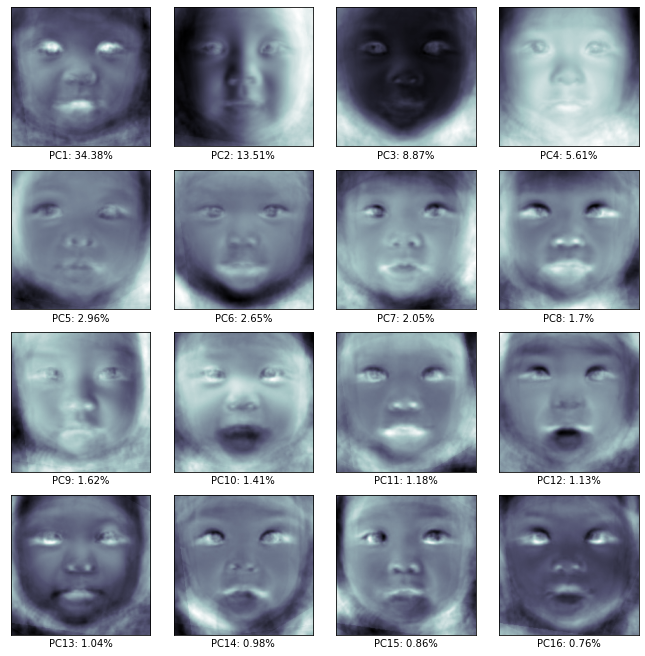

In [80]:
A_img = A.reshape(images.shape[0], 200, 200)
fig, ax = plt.subplots(4, 4, figsize=(9,9), constrained_layout=True)
for i in range(0,4):
    for j in range(0,4):
        ax[i,j].imshow( A_img[i * 4 + j]*pca.explained_variance_[i*4+j] + means , cmap="bone")
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_xlabel(f"PC{i*4+j+1}: {round(pca.explained_variance_ratio_[i*4+j]*100,2)}%")
        #ax[i,j].set_axis_off()
plt.savefig("ugly babies.png")
plt.show()


In [81]:
# Greedy forward feature selection
tolerance = 0.001
features = np.full((images.shape[0]), False)
target = cidx.values


old_score = np.inf
for i in range(images.shape[0]):
    # Keep track of scores
    scores = np.full((images.shape[0]), np.inf)
    for i in range(len(features)):
        if features[i]: # Already selected
            continue
        # Temporarily enable
        features[i] = True

        comps = pca.components_[features]
        X = zero_mean_images @ comps.T
        # Fit regression
        lr = LinearRegression()
        lr.fit(X, target)
        scores[i] = mean_squared_error(lr.predict(X),target)

        # Disable again
        features[i] = False
    # Enable lowest MSE-score component
    min_score = scores.min()
    if min_score + tolerance < old_score:
        print(min_score)
        features[scores.argmin()] = True
        old_score = min_score
    else:
        break
    

0.2925799972724546
0.2749368014696861
0.2606077199893983
0.24724870011814848
0.23405104276581498
0.22245748999378231
0.2131776835908715
0.20442293942278222
0.19629430733740605
0.18838584621859047
0.18074954293776757
0.17330864000790994
0.165888358873103
0.1599408246334023
0.15526015179133967
0.1508834984314153
0.14682988603485522
0.14278252892954849
0.13901295707215863
0.13542639385023378
0.13186696630183667
0.12852254086056386
0.12518984405277342
0.12193112333734568
0.11872309143431342
0.11554729426839766
0.11260782388036877
0.10989829130481771
0.10732794570188804
0.10476698547462866
0.10244055089032358
0.10015052600102461
0.0978636818802115
0.09560629170439955
0.09344629656856922
0.09131351143095946
0.08919153434369032
0.08725605180298947
0.0853423447618109
0.08346404160951615
0.08166658669593035
0.07990313883620227
0.07818811452100943
0.07651067966630774
0.07484839859715851
0.07329161398461306
0.0718152769004872
0.07036575592482797
0.0689408859402516
0.06754602036303547
0.0661953520

In [82]:
np.argwhere(features).shape

(61, 1)

In [83]:
comps = pca.components_[features]
X = zero_mean_images @ comps.T
lr = LinearRegression()
lr.fit(X, target)
B = lr.coef_.T
d = lr.intercept_

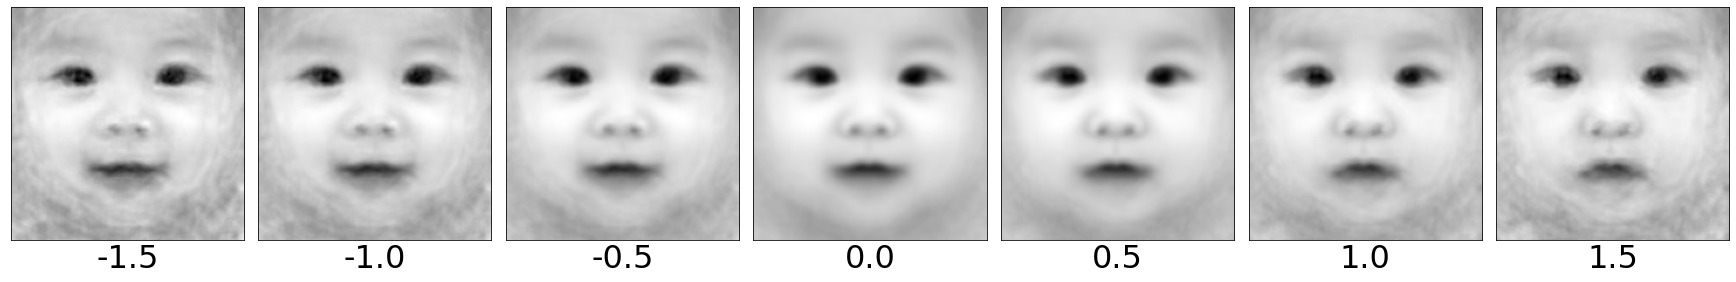

In [ ]:
y = np.array([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])

# y = x B + d
# (y - d) B^-1

fig, ax = plt.subplots(1, len(y), constrained_layout=True, figsize=(24,6))
for i in range(len(y)):
    img = ((y[i] - d) @ np.linalg.pinv(B) @ np.linalg.pinv(comps.T)).reshape(200,200) + means
    ax[i].imshow(img, cmap = "gray")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel(f"{y[i]}", fontsize=32)
plt.savefig("fake_babies.png", bbox_inches="tight")
plt.show()


In [84]:
B.max()

0.0004876891379109748

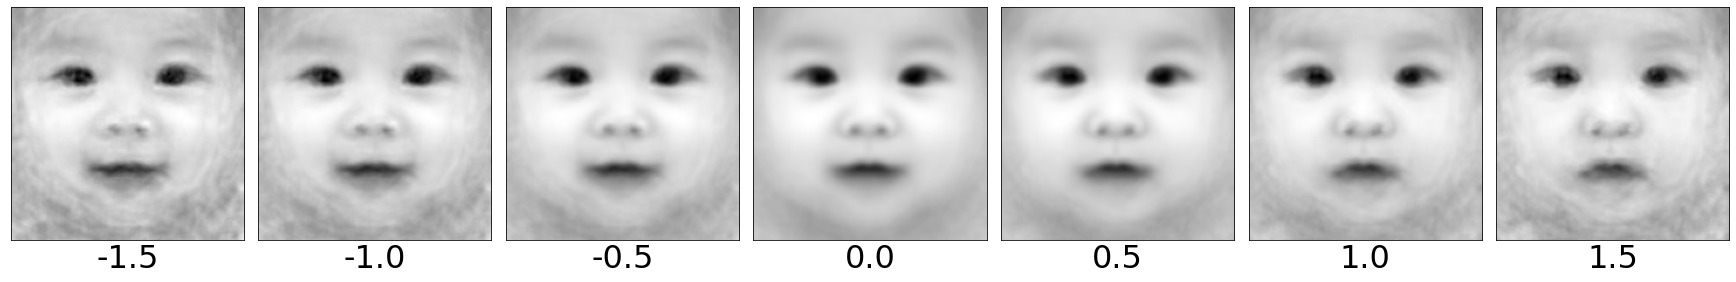

In [85]:
y = np.array([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])

# y = x B + d
# (y - d) B^-1

fig, ax = plt.subplots(1, len(y), constrained_layout=True, figsize=(24,6))
for i in range(len(y)):
    img = ((y[i] - d) @ np.linalg.pinv(B) @ np.linalg.pinv(comps.T)).reshape(200,200) + means
    ax[i].imshow(img, cmap = "gray")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel(f"{y[i]}", fontsize=32)
plt.savefig("fake_babies.png", bbox_inches="tight")
plt.show()


In [139]:
mask = (cidx.values > 0).flatten()
mean_angry_images = images[mask].mean(axis=0)
mean_happy_images = images[~mask].mean(axis=0)

direction_vector = mean_angry_images - mean_happy_images

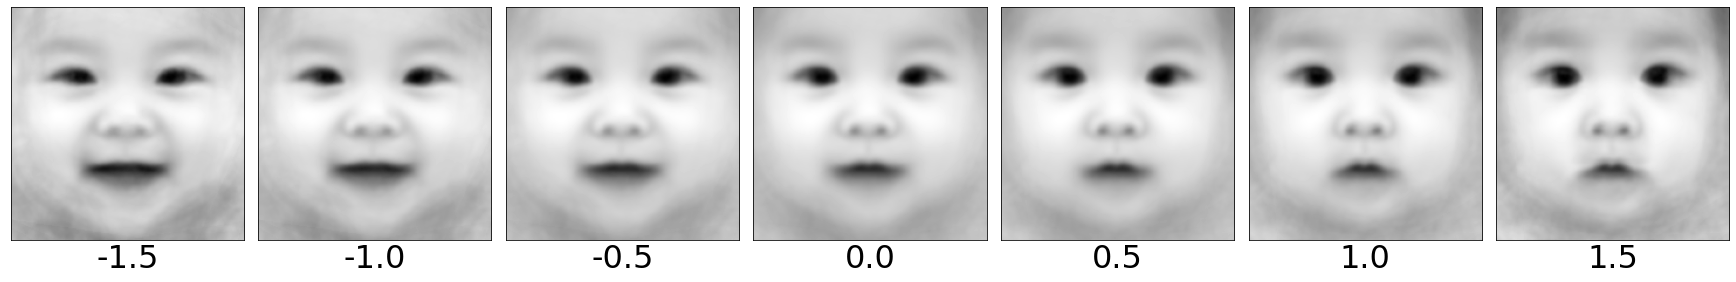

In [140]:
steps = np.linspace(-0.5, 1.5,7)
fig, ax = plt.subplots(1, len(y), constrained_layout=True, figsize=(24,6))
for i in range(len(steps)):
    img = mean_happy_images + steps[i] * direction_vector
    ax[i].imshow(img, cmap = "gray")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel(f"{y[i]}", fontsize=32)
plt.savefig("fake_babies_simple.png", bbox_inches="tight")
plt.show()

In [185]:
N_COMPONENTS = 0.9
pca = PCA(n_components=N_COMPONENTS)
S = pca.fit_transform( zero_mean_images )
A = pca.components_
X = (S @ A).reshape(-1, 200, 200) + means

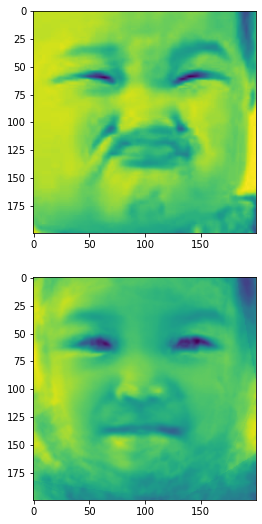

In [190]:
i = 20
plt.figure(figsize=(9,9))
plt.subplot(2,1,1)
plt.imshow(images[i])
plt.subplot(2,1,2)
_=plt.imshow(X[i])

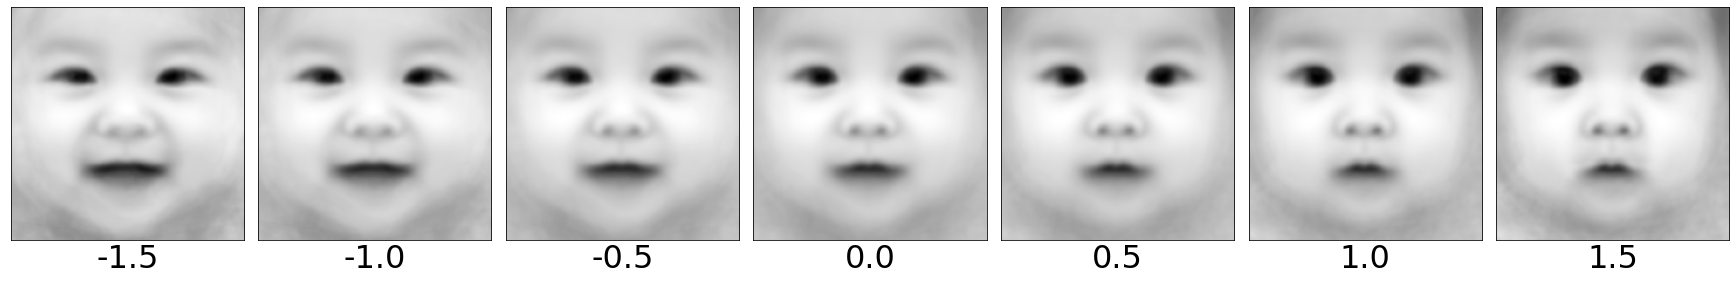

In [191]:
mean_angry_images = X[mask].mean(axis=0)
mean_happy_images = X[~mask].mean(axis=0)

direction_vector = mean_angry_images - mean_happy_images
steps = np.linspace(-0.5, 1.5,7)
fig, ax = plt.subplots(1, len(y), constrained_layout=True, figsize=(24,6))
for i in range(len(steps)):
    img = mean_happy_images + steps[i] * direction_vector
    ax[i].imshow(img, cmap = "gray")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel(f"{y[i]}", fontsize=32)
plt.savefig("fake_babies_pca.png", bbox_inches="tight")
plt.show()